In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import svm, metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split

## Preparing the variables

In [19]:
# Step 0 (splitting)
iris_X, iris_y = load_iris(return_X_y=True)
iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(iris_X, iris_y)
print(len(iris_X_train), len(iris_X_test))

112 38


## SVM with standard scaler

Classification report for classifier Pipeline(steps=[('scale', StandardScaler()), ('model', SVC(gamma=0.01))]):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.71      0.83        17
           2       0.69      1.00      0.81        11

    accuracy                           0.87        38
   macro avg       0.90      0.90      0.88        38
weighted avg       0.91      0.87      0.87        38


Confusion matrix:
[[10  0  0]
 [ 0 12  5]
 [ 0  0 11]]


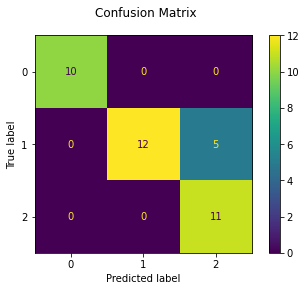

In [20]:
clf = Pipeline(steps=[
      ('scale', StandardScaler()),
      ('model', svm.SVC(gamma=0.01))
])
clf.fit(iris_X_train, iris_y_train)
iris_y_pred = clf.predict(iris_X_test)

print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(iris_y_test, iris_y_pred)}\n")

disp = metrics.plot_confusion_matrix(clf, iris_X_test, iris_y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

## SVM with quantile transformer

Classification report for classifier Pipeline(steps=[('scale', QuantileTransformer(n_quantiles=100)),
                ('model', SVC(gamma=0.1))]):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.71      0.83        17
           2       0.69      1.00      0.81        11

    accuracy                           0.87        38
   macro avg       0.90      0.90      0.88        38
weighted avg       0.91      0.87      0.87        38


Confusion matrix:
[[10  0  0]
 [ 0 12  5]
 [ 0  0 11]]


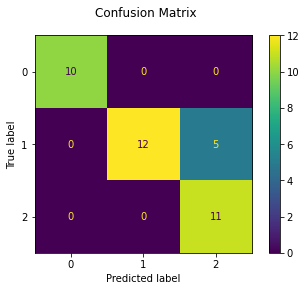

In [21]:
clf = Pipeline(steps=[
      ('scale', QuantileTransformer(n_quantiles=100)),
      ('model', svm.SVC(gamma=0.1))
])
clf.fit(iris_X_train, iris_y_train)
iris_y_pred = clf.predict(iris_X_test)

print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(iris_y_test, iris_y_pred)}\n")

disp = metrics.plot_confusion_matrix(clf, iris_X_test, iris_y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()